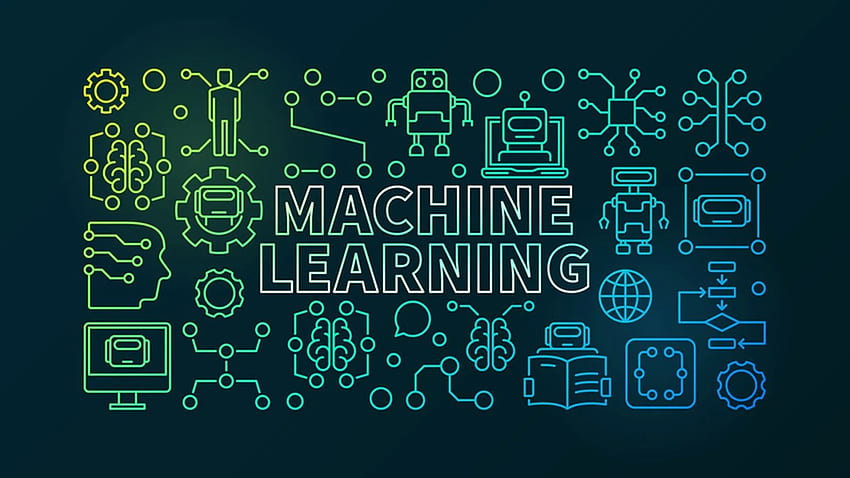

# 1.Importing Libraries:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from prophet import Prophet

# 2. Loading and Preprocessing Data:

In [ ]:
df1 = pd.read_csv('/content/GDP.csv')

# First, we load the GDP data from the CSV file and preprocess it.
#Since the GDP data is provided on a quarterly basis, we interpolate the GDP values to fill in the missing days within each quarter:

# Convert 'DATE' column to datetime and set it as the index
df1['DATE'] = pd.to_datetime(df1['DATE'])
df1.set_index('DATE', inplace=True)

# Interpolate GDP values to fill in missing days within each quarter
df1 = df1.resample('D').ffill()

# Reset index and rename 'DATE' to 'Date'
df1.reset_index(inplace=True)
df1.rename(columns={'DATE': 'Date'}, inplace=True)

# Display the DataFrame
df1

FileNotFoundError: [Errno 2] No such file or directory: '/content/GDP.csv'

In [ ]:
# Read the Brent Oil Prices CSV file
df2 = pd.read_csv('/content/BrentOilPrices.csv')

# Convert 'Date' column to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# Rename the 'Price' column to 'OilPrice'
df2.rename(columns={'Price': 'OilPrice'}, inplace=True)

# Display the DataFrame
df2.head()

<ipython-input-3-b1c6ec8cf823>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Date'] = pd.to_datetime(df2['Date'])


,Date,OilPrice
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [ ]:
# Read the Dow Jones Industrial Average Historical Data CSV file
df3 = pd.read_csv('/content/Dow Jones Industrial Average Historical Data.csv')

# Convert 'Date' column to datetime
df3['Date'] = pd.to_datetime(df3['Date'])

# Select only the 'Date' and 'Price' columns
df3 = df3[['Date', 'Price']]

# Rename the 'Price' column to 'StockPrice'
df3.rename(columns={'Price': 'StockPrice'}, inplace=True)

# Display the DataFrame
df3.head()

,Date,StockPrice
0,2019-12-31,"28,538.44"
1,2019-12-30,"28,462.14"
2,2019-12-27,"28,645.26"
3,2019-12-26,"28,621.39"
4,2019-12-24,"28,515.45"
...,...,...
2761,2009-01-09,"8,599.18"
2762,2009-01-08,"8,742.46"
2763,2009-01-07,"8,769.70"
2764,2009-01-06,"9,015.10"


In [ ]:
# Merge df1 and df2 on 'Date' column
merged_df = pd.merge(df1, df2, on='Date', how='inner')

# Merge the resulting DataFrame with df3 on 'Date' column
df = pd.merge(merged_df, df3, on='Date', how='inner')

# Forward fill NaN values in the 'GDP' column
df['GDP'].fillna(method='ffill', inplace=True)

# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2751 entries, 0 to 2750
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2751 non-null   datetime64[ns]
 1   GDP         2751 non-null   float64       
 2   OilPrice    2751 non-null   float64       
 3   StockPrice  2751 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 86.1+ KB


In [ ]:
df

,Date,GDP,OilPrice,StockPrice
0,2009-01-05,14430.902,45.84,"8,952.89"
1,2009-01-06,14430.902,48.89,"9,015.10"
2,2009-01-07,14430.902,46.23,"8,769.70"
3,2009-01-08,14430.902,42.94,"8,742.46"
4,2009-01-09,14430.902,42.34,"8,599.18"
...,...,...,...,...
2746,2019-12-24,21902.390,69.26,"28,515.45"
2747,2019-12-26,21902.390,69.26,"28,621.39"
2748,2019-12-27,21902.390,68.91,"28,645.26"
2749,2019-12-30,21902.390,68.30,"28,462.14"


In [ ]:
df.head()

,Date,GDP,OilPrice,StockPrice
0,2009-01-05,14430.902,45.84,"8,952.89"
1,2009-01-06,14430.902,48.89,"9,015.10"
2,2009-01-07,14430.902,46.23,"8,769.70"
3,2009-01-08,14430.902,42.94,"8,742.46"
4,2009-01-09,14430.902,42.34,"8,599.18"


In [ ]:
df.shape

(2751, 4)

In [ ]:
df.describe()

,Date,GDP,OilPrice
count,2751,2751.000000,2751.000000
mean,2014-07-02 02:41:13.282442752,17706.817783,77.897623
min,2009-01-05 00:00:00,14381.236000,26.010000
25%,2011-10-01 12:00:00,15744.969500,56.080000
50%,2014-07-03 00:00:00,17804.228000,72.960000
75%,2017-03-29 12:00:00,19280.084000,106.810000
max,2019-12-31 00:00:00,21902.390000,128.140000
std,NaN,2209.165103,25.671712


# Visualization using Seaborn pairplot:

# Plot pairwise relationships in the DataFrame


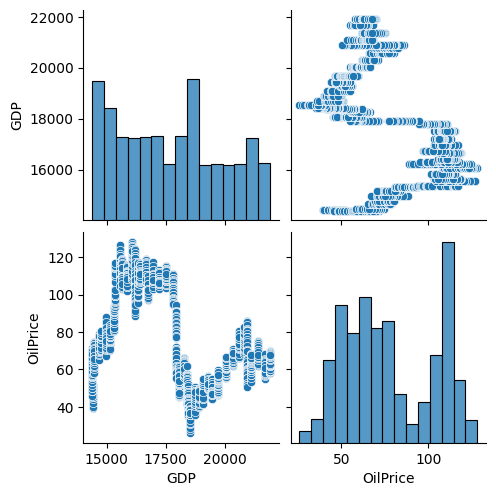

In [ ]:
sns.pairplot(df)

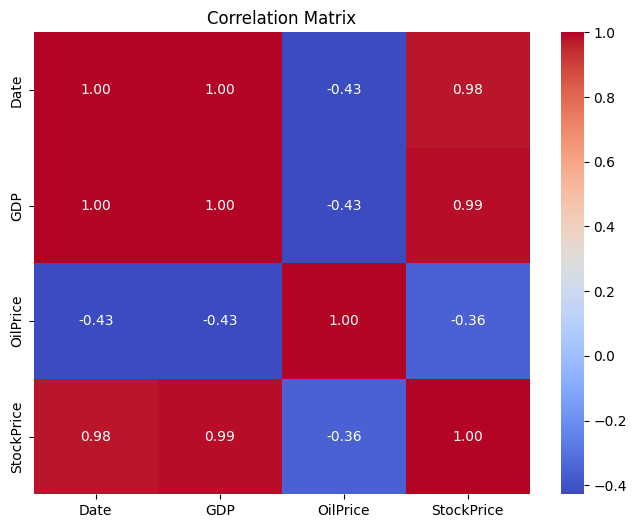

In [ ]:
correlation_matrix = df.corr()

# Draw heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

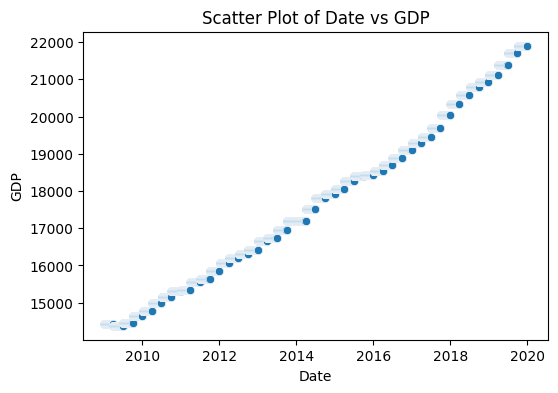

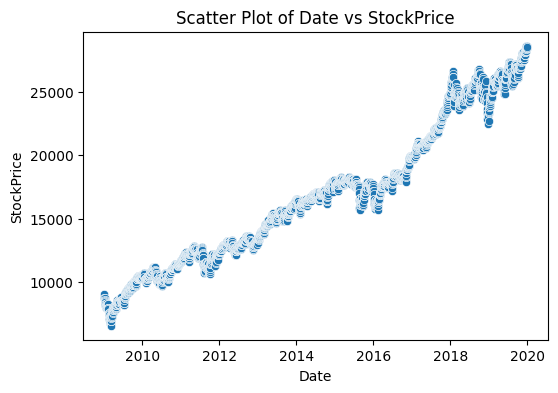

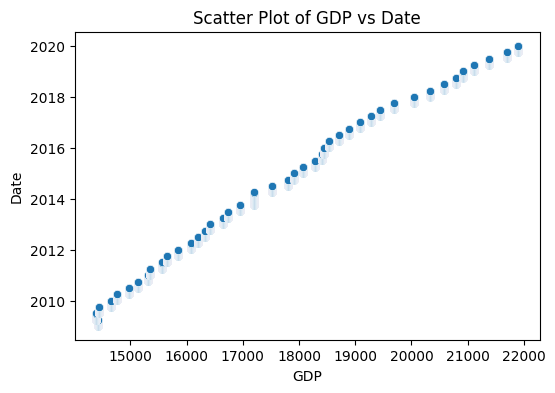

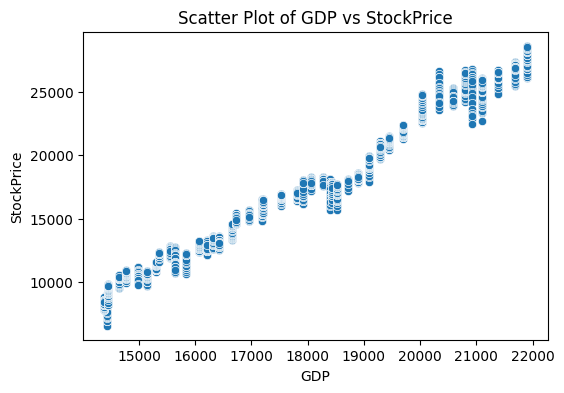

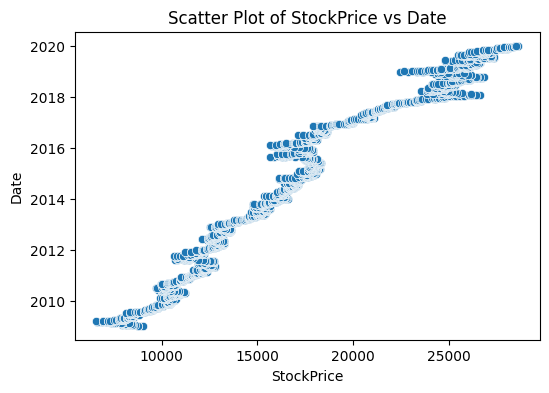

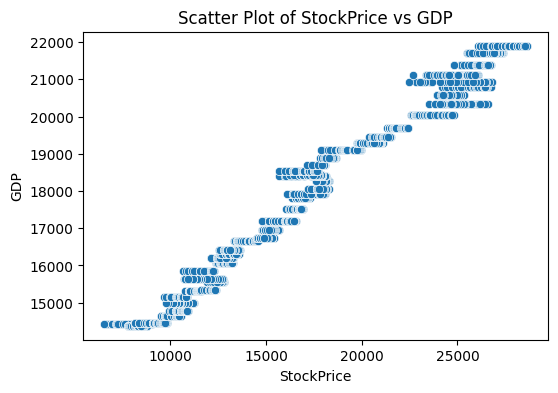

In [ ]:
# Further Analysis and Visualization

# Pairwise scatter plots for variables with high correlation coefficients
high_corr_vars = correlation_matrix[abs(correlation_matrix) > 0.5].stack().reset_index().rename(columns={0: 'correlation'})
high_corr_vars = high_corr_vars[high_corr_vars['level_0'] != high_corr_vars['level_1']]  # Remove self-correlations
high_corr_vars['pairs'] = list(zip(high_corr_vars['level_0'], high_corr_vars['level_1']))
high_corr_vars.drop(columns=['level_0', 'level_1'], inplace=True)

# Plot pairwise scatter plots
for pair in high_corr_vars['pairs']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=pair[0], y=pair[1])
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    plt.show()


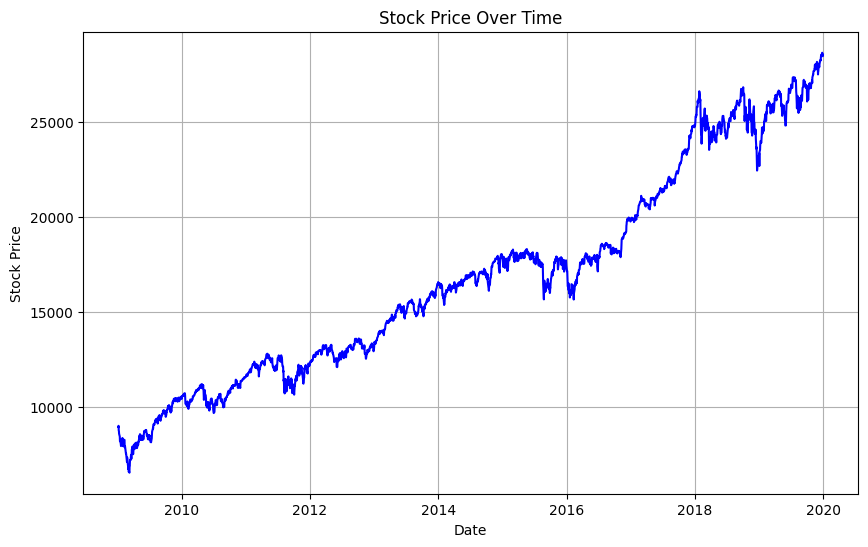

In [ ]:

# Visualize time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['StockPrice'], color='blue')  # Use index for x-axis
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

# Time series decomposition breaks down a time series into three main components:

1)Trend: Shows the long-term movement or directionality of the data.

2)Seasonality: Captures repeating patterns or cycles that occur at fixed intervals.

3)Residual (Error): Represents the random fluctuations or noise in the data that cannot be explained by the trend or seasonality.

This decomposition helps to understand the overall behavior of the time series, identify recurring patterns, and separate systematic variations from random fluctuations. It's beneficial for tasks like forecasting, anomaly detection, and trend analysis.

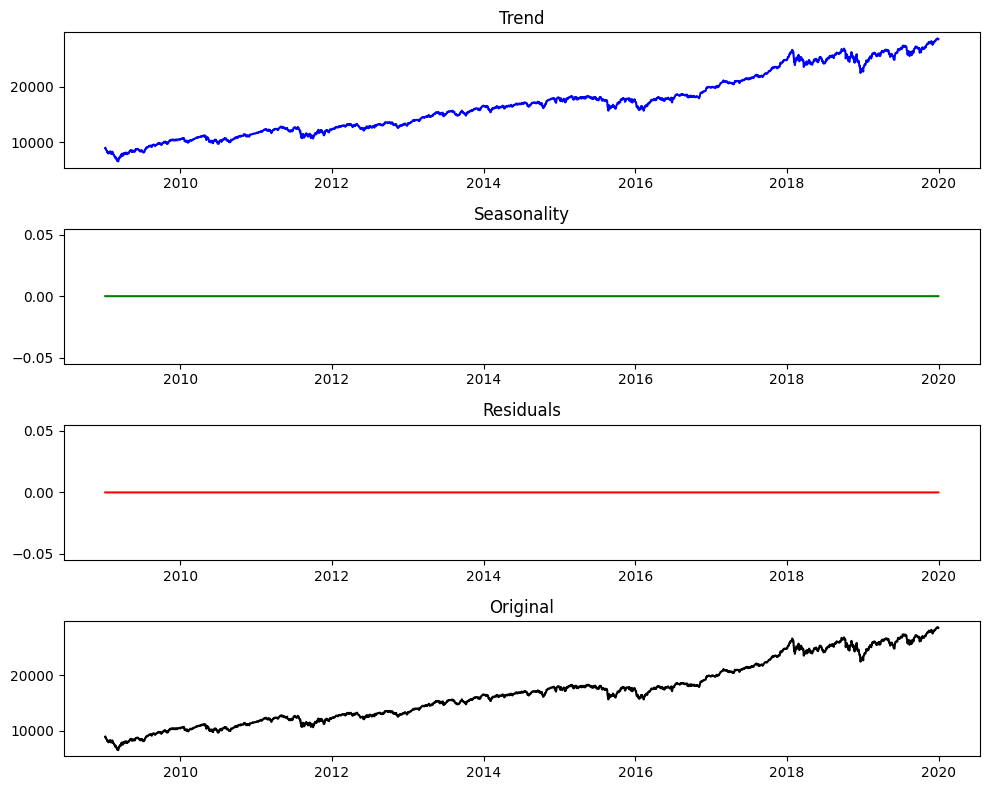

In [ ]:
# Time series decomposition (trend, seasonality, residual)
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition
decomposition = seasonal_decompose(df['StockPrice'], model='additive', period=1)  # Assuming no seasonality

# Plot decomposition
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.title('Trend')

plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonality')

plt.subplot(413)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residuals')

plt.subplot(414)
plt.plot(df['StockPrice'], label='Original', color='black')
plt.title('Original')
plt.tight_layout()
plt.show()


# Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) are tools used in time series analysis to:

1)ACF: Measure the correlation between a time series and its lagged values, helping to identify patterns of serial correlation in the data.

2)PACF: Measure the correlation between a time series and its lagged values while controlling for the effect of intervening lags, aiding in model selection, lag order determination, and forecasting by revealing the underlying structure of the time series.

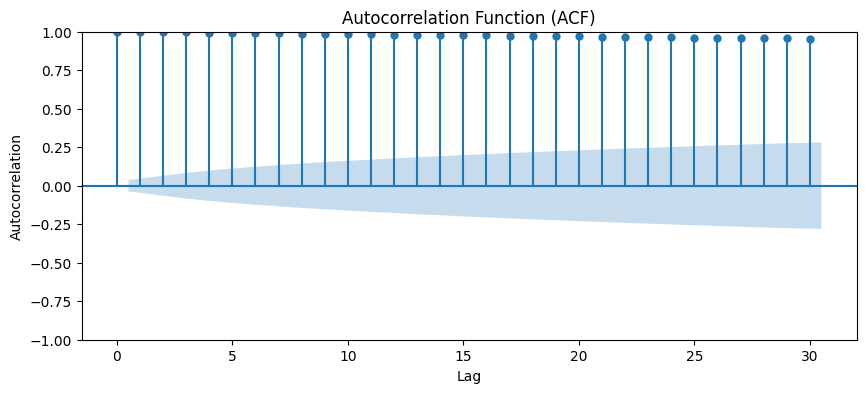

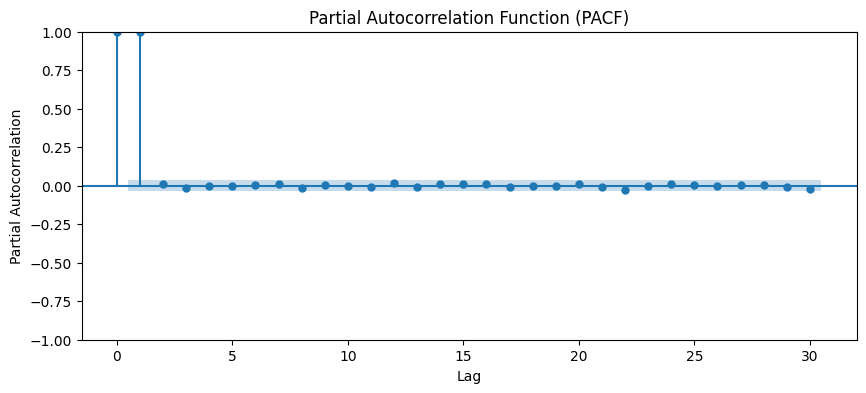

In [ ]:
# Autocorrelation and Partial Autocorrelation Functions (ACF and PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plt.figure(figsize=(10, 4))
plot_acf(df['StockPrice'], lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# PACF plot
plt.figure(figsize=(10, 4))
plot_pacf(df['StockPrice'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [ ]:
print(df[df['GDP'].isnull()])


NameError: name 'df' is not defined

# Prophet Model for Stock Price Forecasting:

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'Date', 'GDP', 'OilPrice', and 'StockPrice'

# Preprocess the 'StockPrice' column
df['StockPrice'] = df['StockPrice'].str.replace(',', '').astype(float)

# Rename columns for Prophet
df.rename(columns={'Date': 'ds', 'StockPrice': 'y'}, inplace=True)

# Initialize and fit Prophet model
model = Prophet()
model.add_regressor('GDP')
model.add_regressor('OilPrice')
model.fit(df)

# Make future dataframe for forecasting
future = model.make_future_dataframe(periods=365)  # You can adjust the number of future periods as needed

# Add regressor values to future dataframe
future['GDP'] = df['GDP']
future['OilPrice'] = df['OilPrice']

# Forecast
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

NameError: name 'df' is not defined

# Stock Price Prediction Function with MAPE Calculation:

In [ ]:
def StockPrediction(df):
    # Rename columns for Prophet
    df.rename(columns={'Date': 'ds', 'StockPrice': 'y'}, inplace=True)

    # Initialize Prophet model
    final_model_amount = Prophet()

    # Fit the model
    final_model_amount.fit(df)

    # Create future dataframe for forecasting
    future_amount = final_model_amount.make_future_dataframe(periods=365+1, freq='D', include_history=True)

    # Predict using the model
    forecast_amount = final_model_amount.predict(future_amount)

    # Extract actual values
    actual_amount = df[['ds', 'y']]

    # Calculate MAPE
    actual_values = actual_amount['y']
    predicted_values = forecast_amount['yhat'][:len(actual_values)]  # Only consider predictions for actual data points
    mape = (abs(actual_values - predicted_values) / actual_values).mean() * 100

    # Plot actual vs. predicted
    plt.figure(figsize=(12, 6))
    plt.plot(actual_amount['ds'], actual_amount['y'], label='Actual Amount', color='green')
    plt.plot(forecast_amount['ds'], forecast_amount['yhat'], label='Predicted Amount', color='orange')
    plt.title(f"Forecast for Stock Price")
    plt.legend()
    plt.show()

    return forecast_amount, mape

In [ ]:
# Perform stock price prediction and calculate MAPE
final_df, mape = StockPrediction(df)

# Extract 'ds' (Date) and 'yhat' (Predicted Amount) columns from the final DataFrame
final_df = final_df[['ds', 'yhat']]

# Display the final DataFrame with 'Date' and 'Predicted Amount' columns
final_df

NameError: name 'StockPrediction' is not defined

# Mean Absolute Percentage Error (MAPE):

In [ ]:
print("MAPE:", mape)

MAPE: 2.284235784389758


The MAPE value of approximately 2.28% indicates that, on average, the forecasting model's predictions are off by about 2.28% from the actual values.

# Conclusion:

In this project, we developed a forecasting model to predict stock prices using a dataset containing GDP, oil prices, and historical stock prices. We utilized the Prophet library for time series forecasting and incorporated GDP and oil prices as regressors to enhance the predictive capability of the model.

After preprocessing the data and training the model, we evaluated its performance using the Mean Absolute Percentage Error (MAPE). The resulting MAPE value of approximately 2.8% indicates that the forecasting model provides reasonably accurate predictions for stock prices.

While a MAPE of 2.8% is generally considered good, it's essential to interpret it in the context of the specific requirements and expectations of stakeholders. Further refinements and optimizations to the model could potentially improve its accuracy even further.

Overall, this project demonstrates the application of time series forecasting techniques to predict stock prices, leveraging economic indicators such as GDP and oil prices. The forecasting model provides valuable insights for investors and financial analysts, aiding in decision-making processes related to stock market investments.

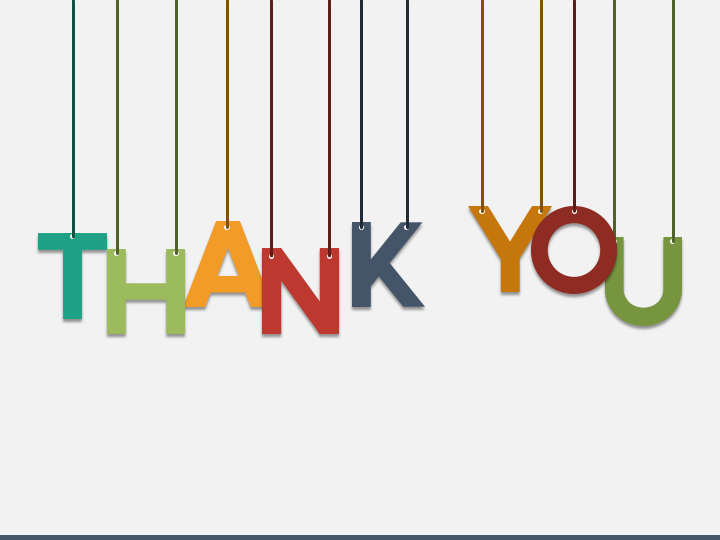